# Visualization of the results

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ColorConverter
from matplotlib.colors import LinearSegmentedColormap

import os
import numpy as np
import pandas as pd


In [ ]:
# Set global parameters
rng_seed = 42
plt.rcParams['font.size'] = 12  # sets the default font size for all elements
plt.rcParams['axes.titlesize'] = 16  # specific font size for titles
plt.rcParams['axes.labelsize'] = 14  # specific font size for axis labels
plt.rcParams['xtick.labelsize'] = 12  # specific font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 12  # specific font size for y-tick labels
plt.rcParams['legend.fontsize'] = 12  # specific font size for legend
plt.rcParams['font.weight'] = 'bold'  # Set all text to bold
plt.rcParams['font.family'] = 'Times New Roman'

In [ ]:
# calculate or load the rgb images
def calc_rgb_image(file_name, df_scores=None, gene_list_x=None, gene_list_y=None):
    # Check if file exists
    if os.path.exists(file_name):
        # Load the image from file
        image = np.load(file_name)
    else:
        # calculate the image
        num_gene = len(gene_list)
        # Initialize an empty image array
        image = np.zeros((num_gene, num_gene, 3))  
        # Populate the image array
        for i in range(num_gene):
            for j in range(num_gene):
                # Find the cv scores for the gene pair (gene_list[i], gene_list[j])
                subset = df_scores[((df_scores['Gene 1'] == gene_list_y[i]) & (df_scores['Gene 2'] == gene_list_x[j])) |
                            ((df_scores['Gene 2'] == gene_list_y[i]) & (df_scores['Gene 1'] == gene_list_x[j]))]        
                # Check if there is data available for the gene pair
                if not subset.empty:
                    red = subset['cv_VR'].iloc[0] 
                    green = subset['cv_MAYO'].iloc[0]
                    blue = subset['cv_GSE'].iloc[0]
                    image[i, j] = [red, green, blue]            
        # save the computed image
        np.save(file_name, image)

    return image 

def vis_all_gene_pairs(image, thres, figure_name, origin='top'):
    # threshold the image
    image = np.where(image < thres, 0, image)
    # Plot the image
    fig, ax = plt.subplots(figsize=(6, 6))
    # plt.title(f'Visualization of classification accuracy \n (Thresholded at {thres})', fontweight='bold')
    plt.xlabel('Gene 1 Index', fontweight='bold')
    plt.ylabel('Gene 2 Index', fontweight='bold')

    if origin == 'top':
        plt.imshow(image)
        # move x-ticks to the top
        plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
        # Move x-axis label to the top
        ax.xaxis.set_label_position('top')
    elif origin == 'bot':
        plt.imshow(image, origin='lower')
    # 
    plt.savefig(figure_name, dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

def vis_top_gene_pairs(image, n, thres, gene_list_x, gene_list_y, figure_name, gene_sort='top', origin='top'):
    # threshold the image 
    image = np.where(image < thres, 0, image)
    # Plot the subset of the image
    fig, ax = plt.subplots(figsize=(6, 6))
    # 
    if gene_sort == 'top':
        subset_image = image[:n, :n, :]
        gene_labels_x = gene_list_x[:n]
        gene_labels_y = gene_list_y[:n]
        # plt.title(f'Visualization of classification accuracy \n (Top {n} Genes, Thresholded at {thres})', fontweight='bold')
    elif gene_sort == 'bot':
        subset_image = image[-n:, -n:, :]
        gene_labels_x = gene_list_x[-n:]
        gene_labels_y = gene_list_y[-n:]
        # plt.title(f'Visualization of classification accuracy \n (Bottom {n} Genes, Thresholded at {thres})', fontweight='bold')
    #
    plt.xlabel('Gene 1', fontweight='bold')
    plt.ylabel('Gene 2', fontweight='bold')
    plt.xticks(ticks=range(n), labels=gene_labels_x, rotation=90)  # Rotate x-tick labels for better readability
    plt.yticks(ticks=range(n), labels=gene_labels_y)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    #
    if origin == 'top':
        plt.imshow(subset_image)
        # move x-ticks to the top
        plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
        # Move x-axis label to the top
        ax.xaxis.set_label_position('top')
    elif origin == 'bot':
        plt.imshow(subset_image, origin='lower')
    # 
    plt.savefig(figure_name, dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

# RGB in different channels
def vis_all_gene_pairs_2(image, thres, figure_name, origin='top'):
    # Apply threshold
    image = np.where(image < thres, 0, image)

    # Names for saving figures if required
    suffixes = ['_R.pdf', '_G.pdf', '_B.pdf']
    channels = ['Red', 'Green', 'Blue']
    colors = ['red', 'green', 'blue']  # RGB colors for the colorbar

    # Create plots for each channel
    for i, color_channel in enumerate(channels):
        fig, ax = plt.subplots(figsize=(6, 6))
        # get the channels
        channel_image = np.zeros_like(image)
        channel_image[:, :, i] = image[:, :, i]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 0, 0), colors[i]], N=256)
        # 
        # plt.title(f'Visualization of {color_channel} Channel (Thresholded at {thres})', fontweight='bold')
        plt.xlabel('Gene 1 Index', fontweight='bold')
        plt.ylabel('Gene 2 Index', fontweight='bold')
        
        if origin == 'top':
            im_plot = plt.imshow(channel_image, cmap=cmap, vmin=0, vmax=1)
            # move x-ticks to the top
            plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
            # Move x-axis label to the top
            ax.xaxis.set_label_position('top')
        elif origin == 'bot':
            im_plot = plt.imshow(image, origin='lower', cmap=cmap, vmin=0, vmax=1)
        #
        cbar = plt.colorbar(im_plot,fraction=0.044, pad=0.04)
        # cbar.set_label('Acurracy', fontsize=12, fontweight='bold', labelpad=8) 
        cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        # Check if figure name is provided and save the figure
        if figure_name:
            plt.savefig(figure_name + suffixes[i], dpi=300, format='pdf', bbox_inches='tight')

        plt.show()


def vis_top_gene_pairs_2(image, top_n, thres, gene_list_x, gene_list_y, figure_name):
    # threshold the image 
    image = np.where(image < thres, 0, image)
    # 
    subset_image = image[:top_n, :top_n, :]
    gene_labels_x = gene_list_x[:top_n]
    gene_labels_y = gene_list_y[:top_n]
    # 
    # Names for saving figures if required
    suffixes = ['_R.png', '_G.png', '_B.png']
    channels = ['Red', 'Green', 'Blue']
    
    # Plot the subset of the image
    for i, color_channel in enumerate(channels):
        plt.figure(figsize=(6, 6)) 
        plt.imshow(subset_image[:, :, i], origin='lower', cmap='gray')  # Display the subset with the origin at the bottom left
        plt.title(f'Visualization of {color_channel} Channel \n (Top {top_n} Genes, Thresholded at {thres})', fontweight='bold')
        plt.xlabel('Gene 1', fontweight='bold')
        plt.ylabel('Gene 2', fontweight='bold')
        plt.xticks(ticks=range(top_n), labels=gene_labels_x, rotation=90)  # Rotate x-tick labels for better readability
        plt.yticks(ticks=range(top_n), labels=gene_labels_y)
        plt.savefig(figure_name + suffixes[i], dpi=300, format='png', bbox_inches='tight')
        plt.show()


def vis_bot_gene_pairs_2(image, bot_n, thres, gene_list_x, gene_list_y, figure_name):
    # threshold the image 
    image = np.where(image < thres, 0, image)
    # 
    subset_image = image[-bot_n:, -bot_n:, :]
    gene_labels_x = gene_list_x[-bot_n:]
    gene_labels_y = gene_list_y[-bot_n:]
    # 
    # Names for saving figures if required
    suffixes = ['_R.png', '_G.png', '_B.png']
    channels = ['Red', 'Green', 'Blue']
    
    # Plot the subset of the image
    for i, color_channel in enumerate(channels):
        plt.figure(figsize=(6, 6)) 
        plt.imshow(subset_image[:, :, i], origin='lower', cmap='gray')  # Display the subset with the origin at the bottom left
        plt.title(f'Visualization of {color_channel} Channel \n (bottom {bot_n} Genes, Thresholded at {thres})', fontweight='bold')
        plt.xlabel('Gene 1', fontweight='bold')
        plt.ylabel('Gene 2', fontweight='bold')
        plt.xticks(ticks=range(bot_n), labels=gene_labels_x, rotation=90)  # Rotate x-tick labels for better readability
        plt.yticks(ticks=range(bot_n), labels=gene_labels_y)
        plt.savefig(figure_name + suffixes[i], dpi=300, format='png', bbox_inches='tight')
        plt.show()

## Figure 1: RGB gene plot - sort with aggregated scores

In [ ]:
# Genes sorted by aggregated socres
file_path = '../Results/Fernando/scores_fromVR_500.xlsx'
# load the cv scores
sheet_name = 'scores_fromVR_500'
df_scores = pd.read_excel(file_path, sheet_name=sheet_name)
# print(df_scores)
# load the aggregated scores
sheet_name = 'Threshold_0.7'
df_agg_score = pd.read_excel(file_path, sheet_name=sheet_name)
# Extract the 'Gene' column and remove NaN values
gene_list = df_agg_score['Gene'].dropna().tolist()
# 
file_name = 'cv_accuracies_image_scores_fromVR_500.npy'
image = calc_rgb_image(file_name, df_scores, gene_list, gene_list)

In [ ]:
thres = 0.5
# plot all genes
figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_500.pdf'
vis_all_gene_pairs(image, thres, figure_name)

# plot the top n genes
n = 50
figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_top{n}.pdf'
vis_top_gene_pairs(image, n, thres, gene_list, gene_list, figure_name)

# plot the bottom n genes
figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_bot{n}.pdf'
vis_top_gene_pairs(image, n, thres, gene_list, gene_list, figure_name, 'bot')

In [ ]:
thres = 0.5
# plot all genes
figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_500'
vis_all_gene_pairs_2(image, thres, figure_name)

# plot the top n genes
# top_n = 50
# figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_top{top_n}'
# vis_top_gene_pairs_2(image, top_n, thres, gene_list, gene_list, figure_name)

# plot the bottom n genes
# bot_n = 50
# figure_name = f'../Figures/cv_accuracies_image_thres{thres}_scores_fromVR_bot{bot_n}'
# vis_bot_gene_pairs_2(image, bot_n, thres, gene_list, gene_list, figure_name)

## Figure 1: RGB gene plot - sort with selectivity scores

In [ ]:
# Genes sorted by selectivity socres
file_path = '../Results/Fernando/scores_fromVR_500.xlsx'
# load the cv scores
sheet_name = 'scores_fromVR_500'
df_scores = pd.read_excel(file_path, sheet_name=sheet_name)
# print(df_scores)
# load the aggregated scores
sheet_name = 'Selectivity'
df_sel_score = pd.read_excel(file_path, sheet_name=sheet_name)
# Extract the 'Gene' column and remove NaN values
gene_list = df_sel_score['Gene'].dropna().tolist()
# 
file_name = 'cv_accuracies_image_scores_fromVR_500_selectivity.npy'
# 
image = calc_rgb_image(file_name, df_scores, gene_list, gene_list)


In [ ]:
thres = 0.5
# plot all genes
figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_500.pdf'
vis_all_gene_pairs(image, thres, figure_name)

# plot the top n genes
n = 50
figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_top{n}.pdf'
vis_top_gene_pairs(image, n, thres, gene_list, gene_list, figure_name)

# plot the bottom n genes
figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_bot{n}.pdf'
vis_top_gene_pairs(image, n, thres, gene_list, gene_list, figure_name, gene_sort='bot')

In [ ]:
thres = 0.5
# plot all genes
figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_500'
vis_all_gene_pairs_2(image, thres, figure_name)

# plot the top n genes
# top_n = 50
# figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_top{top_n}'
# vis_top_gene_pairs_2(image, top_n, thres, gene_list, gene_list, figure_name)

# plot the bottom n genes
# bot_n = 50
# figure_name = f'../Figures/cv_accuracies_image_selectivity_thres{thres}_scores_fromVR_bot{bot_n}'
# vis_bot_gene_pairs_2(image, bot_n, thres, gene_list, gene_list, figure_name)

## Figure 2: Bar plot showing the cv accuracies

In [ ]:
# load the cv scores - VR
file_path = '../Results/Fernando/scores_fromVR_500.xlsx'
sheet_name = 'Threshold_0.7'
df_scores_vr = pd.read_excel(file_path, sheet_name=sheet_name)
# print(df_scores)

# load the cv scores - MAYO
file_path = '../Results/Fernando/scores_fromMAYO_500.xlsx'
sheet_name = 'Threshold_0.7'
df_scores_mayo = pd.read_excel(file_path, sheet_name=sheet_name)


# load the cv scores - GSE
file_path = '../Results/Fernando/scores_fromGSE_500.xlsx'
sheet_name = 'Threshold_0.7'
df_scores_gse = pd.read_excel(file_path, sheet_name=sheet_name)



In [ ]:
# Calculate mean and standard deviation for each set of scores
mean_vr = df_scores_vr[['cv_VR', 'cv_MAYO', 'cv_GSE']].mean()
std_vr = df_scores_vr[['cv_VR', 'cv_MAYO', 'cv_GSE']].std()

mean_mayo = df_scores_mayo[['cv_VR', 'cv_MAYO', 'cv_GSE']].mean()
std_mayo = df_scores_mayo[['cv_VR', 'cv_MAYO', 'cv_GSE']].std()

mean_gse = df_scores_gse[['cv_VR', 'cv_MAYO', 'cv_GSE']].mean()
std_gse = df_scores_gse[['cv_VR', 'cv_MAYO', 'cv_GSE']].std()

# Set up the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
x = ['Genes from VR', 'Genes from Mayo', 'Genes from GSE']
indices = np.arange(len(x))  # Dataset indices
bar_width = 0.25  # Width of the bars

# Plotting the data
cv_vr_mean = [mean_vr['cv_VR'], mean_mayo['cv_VR'], mean_gse['cv_VR']]
cv_mayo_mean = [mean_vr['cv_MAYO'], mean_mayo['cv_MAYO'], mean_gse['cv_MAYO']]
cv_gse_mean = [mean_vr['cv_GSE'], mean_mayo['cv_GSE'], mean_gse['cv_GSE']]

cv_vr_std = [std_vr['cv_VR'], std_mayo['cv_VR'], std_gse['cv_VR']]
cv_mayo_std = [std_vr['cv_MAYO'], std_mayo['cv_MAYO'], std_gse['cv_MAYO']]
cv_gse_std = [std_vr['cv_GSE'], std_mayo['cv_GSE'], std_gse['cv_GSE']]

# Plotting VR scores
ax.bar(indices - bar_width, cv_vr_mean, yerr=cv_vr_std, capsize=5, width=bar_width, label='VR', color='r', zorder=3)
# Plotting Mayo scores
ax.bar(indices, cv_mayo_mean, yerr=cv_mayo_std, capsize=5, width=bar_width, label='MAYO', color='g', zorder=3)
# Plotting GSE scores
ax.bar(indices + bar_width, cv_gse_mean, yerr=cv_gse_std, capsize=5, width=bar_width, label='GSE', color='b', zorder=3)

# Set labels and title
# ax.set_xlabel('Datasets')
ax.set_ylabel('Mean Accuracy', fontweight='bold')
ax.set_xticks(indices)  # Set x-ticks to be in the middle of the groups
ax.set_xticklabels(x, fontweight='bold')
y_ticks = np.arange(0, 1, 0.1)
ax.set_yticks(y_ticks)

# Adding a legend
ax.legend(title='Datasets')
ax.grid(True, zorder=0)
#
ax.set_title('Mean accuracy of gene pairs over datasets', fontweight='bold')
#
figure_name = f'../Figures/bar_cv_accuracies_rgb.png'
plt.savefig(figure_name, dpi=300, format='png', bbox_inches='tight')

# Show the plot
plt.show()




In [ ]:
# Try another color scheme

# Set up the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
x = ['Genes from VR', 'Genes from Mayo', 'Genes from GSE']
indices = np.arange(len(x))  # Dataset indices
bar_width = 0.25  # Width of the bars

# Plotting VR scores
ax.bar(indices - bar_width, cv_vr_mean, yerr=cv_vr_std, capsize=5, width=bar_width, label='VR', color='cyan', zorder=3)
# Plotting Mayo scores
ax.bar(indices, cv_mayo_mean, yerr=cv_mayo_std, capsize=5, width=bar_width, label='MAYO', color='magenta', zorder=3)
# Plotting GSE scores
ax.bar(indices + bar_width, cv_gse_mean, yerr=cv_gse_std, capsize=5, width=bar_width, label='GSE', color='yellow', zorder=3)

# Set labels and title
# ax.set_xlabel('Datasets')
ax.set_ylabel('Mean Accuracy', fontweight='bold')
ax.set_xticks(indices)  # Set x-ticks to be in the middle of the groups
ax.set_xticklabels(x, fontweight='bold')
y_ticks = np.arange(0, 1, 0.1)
ax.set_yticks(y_ticks)

# Adding a legend
ax.legend(title='Datasets')
ax.grid(True, zorder=0)
#
ax.set_title('Mean accuracy of gene pairs over datasets', fontweight='bold')
#
figure_name = f'../Figures/bar_cv_accuracies_cmy.png'
plt.savefig(figure_name, dpi=300, format='png', bbox_inches='tight')

# Show the plot
plt.show()

## Figure 3: Aggregated score vs. Selectivity score

In [78]:
# 
file_path = '../Results/Fernando/scores_fromVR_500.xlsx'
# load the aggregated scores
sheet_name = 'Threshold_0.7'
df_agg_score = pd.read_excel(file_path, sheet_name=sheet_name)
# Extract the 'Gene' column and remove NaN values
gene_list_agg = df_agg_score[['Gene', 'cv_average if Gene is in Gene 1 or Gene 2']].dropna()

# load the aggregated scores
sheet_name = 'Selectivity'
df_sel_score = pd.read_excel(file_path, sheet_name=sheet_name)
# Extract the 'Gene' column and remove NaN values
gene_list_sel = df_sel_score[['Gene', 'Selectivity (k=2)']].dropna()

# Merge the DataFrames on 'Gene' column
combined_df = pd.merge(gene_list_agg, gene_list_sel, on='Gene', how='left')

# Check for missing 'Selectivity' values that indicate a missing gene in gene_list_sel
if combined_df['Selectivity (k=2)'].isnull().any():
    missing_genes = combined_df[combined_df['Selectivity (k=2)'].isnull()]['Gene'].tolist()
    raise ValueError(f"Error: The following genes are missing in the selectivity data: {missing_genes}")

# sanity check
row_with_TOX2 = combined_df[combined_df['Gene'] == 'TOX2']

# Print the row
print(row_with_TOX2)

c:\Users\y1mao\anaconda3\envs\AD\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\y1mao\anaconda3\envs\AD\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


     Gene  cv_average if Gene is in Gene 1 or Gene 2  Selectivity (k=2)
334  TOX2                                   3.280952         310.285998


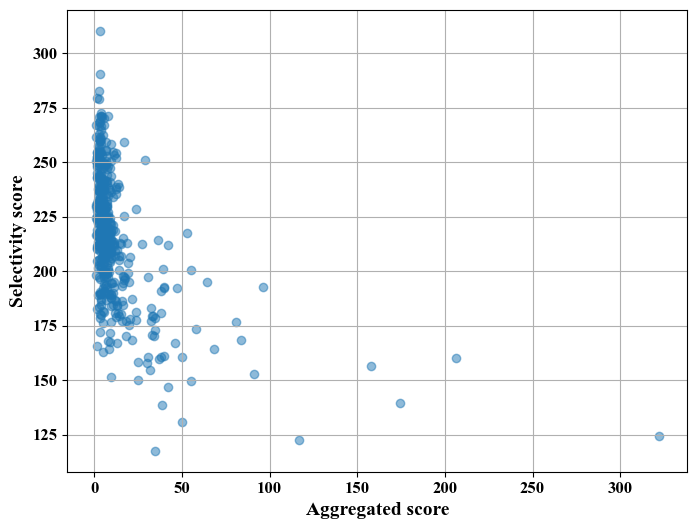

In [80]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['cv_average if Gene is in Gene 1 or Gene 2'], combined_df['Selectivity (k=2)'], alpha=0.5)

# Add title and labels
# plt.title('Scatter Plot of Aggregated vs. Selectivity Scores', fontweight='bold')
plt.xlabel('Aggregated score', fontweight='bold')
plt.ylabel('Selectivity score', fontweight='bold')

# Optionally, you can add a grid for better readability
plt.grid(True)
# 
figure_name = f'../Figures/scatter_agg_vs_sel.pdf'
plt.savefig(figure_name, dpi=300, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

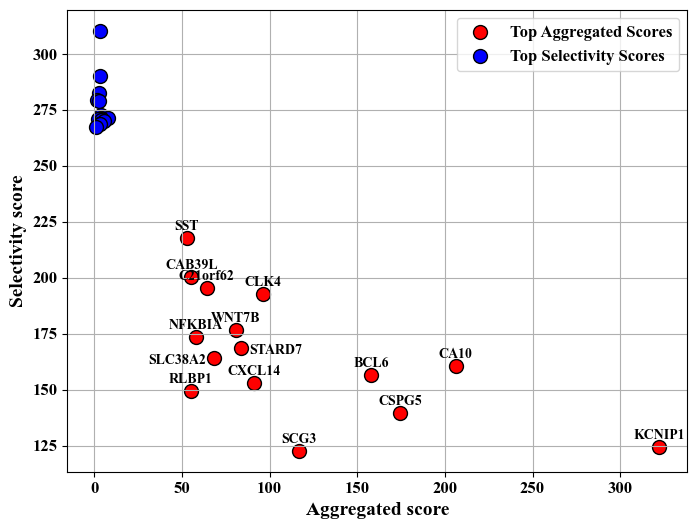

In [84]:
# Sort and select the top samples for each category
top_n = 15
top_agg = combined_df.nlargest(top_n, 'cv_average if Gene is in Gene 1 or Gene 2')
top_sel = combined_df.nlargest(top_n, 'Selectivity (k=2)')

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot top aggregated values in red
plt.scatter(top_agg['cv_average if Gene is in Gene 1 or Gene 2'], top_agg['Selectivity (k=2)'],
            color='red', label='Top Aggregated Scores', s=100, edgecolor='k')  # s is the size of the point
# Label each point
for i, txt in enumerate(top_agg['Gene']):
    if txt == 'STARD7':
        plt.annotate(txt, (top_agg['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_agg['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(25,-4), ha='center', fontsize=10)
    elif txt == 'SLC38A2':
        plt.annotate(txt, (top_agg['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_agg['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(-26,-4), ha='center', fontsize=10)
    else:
        plt.annotate(txt, (top_agg['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_agg['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(0,6), ha='center', fontsize=10)

# Plot top selectivity scores in blue
plt.scatter(top_sel['cv_average if Gene is in Gene 1 or Gene 2'], top_sel['Selectivity (k=2)'],
            color='blue', label='Top Selectivity Scores', s=100, edgecolor='k')  # s is the size of the point
# Label each point
# for i, txt in enumerate(top_sel['Gene']):
    # plt.annotate(txt, (top_sel['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_sel['Selectivity (k=2)'].iloc[i]),
                 # textcoords="offset points", xytext=(0,10), ha='center')

# Add title, labels, legend, and grid
# plt.title(f'Scatter Plot of Aggregated vs. Selectivity Scores \n (Top {top_n} genes included)', fontweight='bold')
plt.xlabel('Aggregated score', fontweight='bold')
plt.ylabel('Selectivity score', fontweight='bold')
plt.legend()
plt.grid(True)
#
# ylim1 = ax1.get_ylim()

#
figure_name = f'../Figures/scatter_agg_vs_sel_top{top_n}.pdf'
plt.savefig(figure_name, dpi=300, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


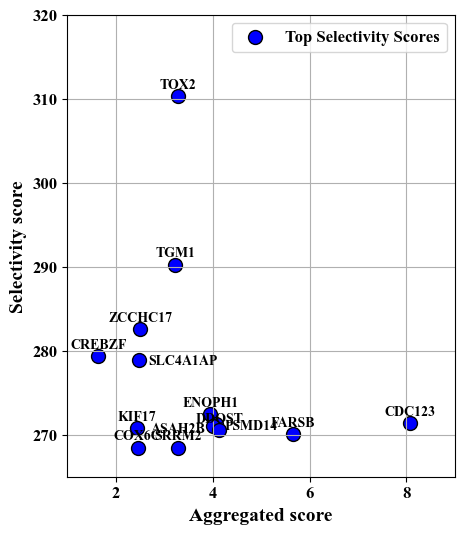

In [85]:
# Create the plot
fig, ax2 = plt.subplots(figsize=(5, 6))

# Plot top selectivity scores in blue
plt.scatter(top_sel['cv_average if Gene is in Gene 1 or Gene 2'], top_sel['Selectivity (k=2)'],
            color='blue', label='Top Selectivity Scores', s=100, edgecolor='k')  # s is the size of the point
# Label each point
for i, txt in enumerate(top_sel['Gene']):
    if txt == 'PSMD14':
        plt.annotate(txt, (top_sel['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_sel['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(25.5,-4), ha='center', fontsize=10)
    elif txt == 'ASAH2B':
        plt.annotate(txt, (top_sel['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_sel['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(-25,-4), ha='center', fontsize=10)
    elif txt == 'SLC4A1AP':
        plt.annotate(txt, (top_sel['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_sel['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(31,-3), ha='center', fontsize=10)
    else:
        plt.annotate(txt, (top_sel['cv_average if Gene is in Gene 1 or Gene 2'].iloc[i], top_sel['Selectivity (k=2)'].iloc[i]),
                    textcoords="offset points", xytext=(0,6), ha='center', fontsize=10)

# Add title, labels, legend, and grid
# plt.title(f'Scatter Plot of Aggregated vs. Selectivity Scores \n (Top {top_n} genes included)', fontweight='bold')
plt.xlabel('Aggregated score', fontweight='bold')
plt.ylabel('Selectivity score', fontweight='bold')
plt.legend()
plt.grid(True)
ax2.set_ylim((265, 320))
ax2.set_xlim((1, 9))
#
figure_name = f'../Figures/scatter_agg_vs_sel_top{top_n}_sel_enlarge.pdf'
plt.savefig(figure_name, dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()